In [1]:
import pandas as pd

In [2]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [5]:
train='train'
test='test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 16s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:

# useful for getting number of output classes
folders = glob('train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 123s 2s/step - loss: 2.7363 - accuracy: 0.4428 - val_loss: 1.2834 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 124s 2s/step - loss: 1.1077 - accuracy: 0.5700 - val_loss: 0.9765 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 124s 2s/step - loss: 1.0204 - accuracy: 0.5884 - val_loss: 1.4971 - val_accuracy: 0.6111
Epoch 4/20
61/61 [==============================] - 125s 2s/step - loss: 1.0599 - accuracy: 0.5941 - val_loss: 0.9414 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 130s 2s/step - loss: 0.7889 - accuracy: 0.6704 - val_loss: 0.7942 - val_accuracy: 0.7778
Epoch 6/20
61/61 [==============================] - 130s 2s/step - loss: 0.8833 - accuracy: 0.6550 - val_loss: 0.7690 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 128s 2s/step - loss: 0.785

In [17]:

import matplotlib.pyplot as plt

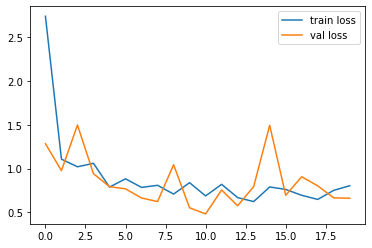

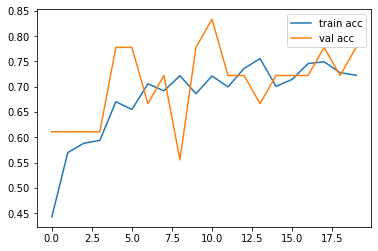

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:

y_pred

array([[8.06975237e-04, 2.41114016e-04, 9.98666286e-01, 2.85615970e-04],
       [1.13051981e-04, 4.88609411e-02, 1.96610931e-02, 9.31364894e-01],
       [5.12442421e-05, 6.67866116e-05, 9.99333560e-01, 5.48353361e-04],
       [3.58462101e-04, 1.50634632e-01, 1.00816421e-01, 7.48190463e-01],
       [2.99132764e-01, 4.17179972e-01, 1.08753815e-01, 1.74933463e-01],
       [7.86918215e-04, 7.38230705e-01, 1.12636916e-01, 1.48345470e-01],
       [2.94064004e-02, 4.72747684e-01, 1.98516786e-01, 2.99329162e-01],
       [7.49693543e-04, 9.61438846e-03, 1.42769724e-01, 8.46866250e-01],
       [4.44642472e-04, 9.81771588e-01, 4.69752966e-04, 1.73139442e-02],
       [4.95496322e-04, 5.19490684e-04, 9.97083604e-01, 1.90145790e-03],
       [2.64087168e-04, 4.54413282e-07, 9.99734700e-01, 7.09819005e-07],
       [1.08557660e-02, 3.60124975e-01, 5.70376515e-01, 5.86427525e-02],
       [4.82896721e-04, 8.92542899e-01, 6.30537281e-04, 1.06343679e-01],
       [9.95921850e-01, 3.89086097e-07, 3.02780536e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 3, 2, 3, 1, 1, 1, 3, 1, 2, 2, 2, 1, 0, 1, 3, 2, 3], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [27]:
img=image.load_img('C:/Users/Durga/Downloads/test/test/fresh cotton leaf/d (341).jpg',target_size=(224,224))

In [28]:

x=image.img_to_array(img)
x

array([[[ 85.,  76.,  71.],
        [ 91.,  82.,  77.],
        [ 91.,  82.,  77.],
        ...,
        [ 60.,  56.,  45.],
        [ 62.,  57.,  51.],
        [ 66.,  61.,  55.]],

       [[ 99.,  90.,  85.],
        [112., 103.,  98.],
        [106.,  97.,  88.],
        ...,
        [ 66.,  57.,  52.],
        [ 66.,  61.,  55.],
        [ 65.,  60.,  54.]],

       [[119., 110., 101.],
        [105.,  96.,  91.],
        [142., 133., 124.],
        ...,
        [ 80.,  71.,  66.],
        [ 81.,  72.,  67.],
        [ 58.,  53.,  47.]],

       ...,

       [[176., 226., 153.],
        [171., 221., 148.],
        [173., 223., 150.],
        ...,
        [137., 185., 127.],
        [137., 185., 125.],
        [141., 189., 129.]],

       [[175., 225., 152.],
        [176., 226., 153.],
        [176., 226., 155.],
        ...,
        [133., 181., 123.],
        [132., 180., 120.],
        [138., 186., 126.]],

       [[173., 223., 150.],
        [167., 217., 146.],
        [175., 2

In [29]:
x.shape

(224, 224, 3)

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[1.0000000e+00, 0.0000000e+00, 3.1755082e-08, 5.0070259e-33]],
      dtype=float32)

In [32]:

a=np.argmax(model.predict(img_data), axis=1)

In [38]:
a==0

array([ True])

## 